# Лабораториска Вежба 2
## Линеарна Регресија, Lasso Регресија и Ridge Регресија

## Вчитување на податочното множество

Податочното множество California Housing може да се вчита од следниот линк: <br>
https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv <br>
или директно од sklearn dataset

In [ ]:
from sklearn.datasets import fetch_california_housing
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import pandas as pd

In [ ]:
california_housing = fetch_california_housing(as_frame=True)
df = california_housing.frame
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
X = california_housing.data 
y = california_housing.target 
number_of_features = X.shape[1]
number_of_targets = 1
features = california_housing.feature_names

print("Number of features is ", X.shape[1]) 
print("Number of targets is 1")
print("Number of instances is ", X.shape[0]) 
print("Feature names:", features)

Number of features is  8
Number of targets is 1
Number of instances is  20640
Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


Број на податоци (N) = 20640, број на атрибути (D) = 8. <br>
Таргет колона: median_house_value

## Анализа на податоците

In [ ]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


## Визуелизација на податоците

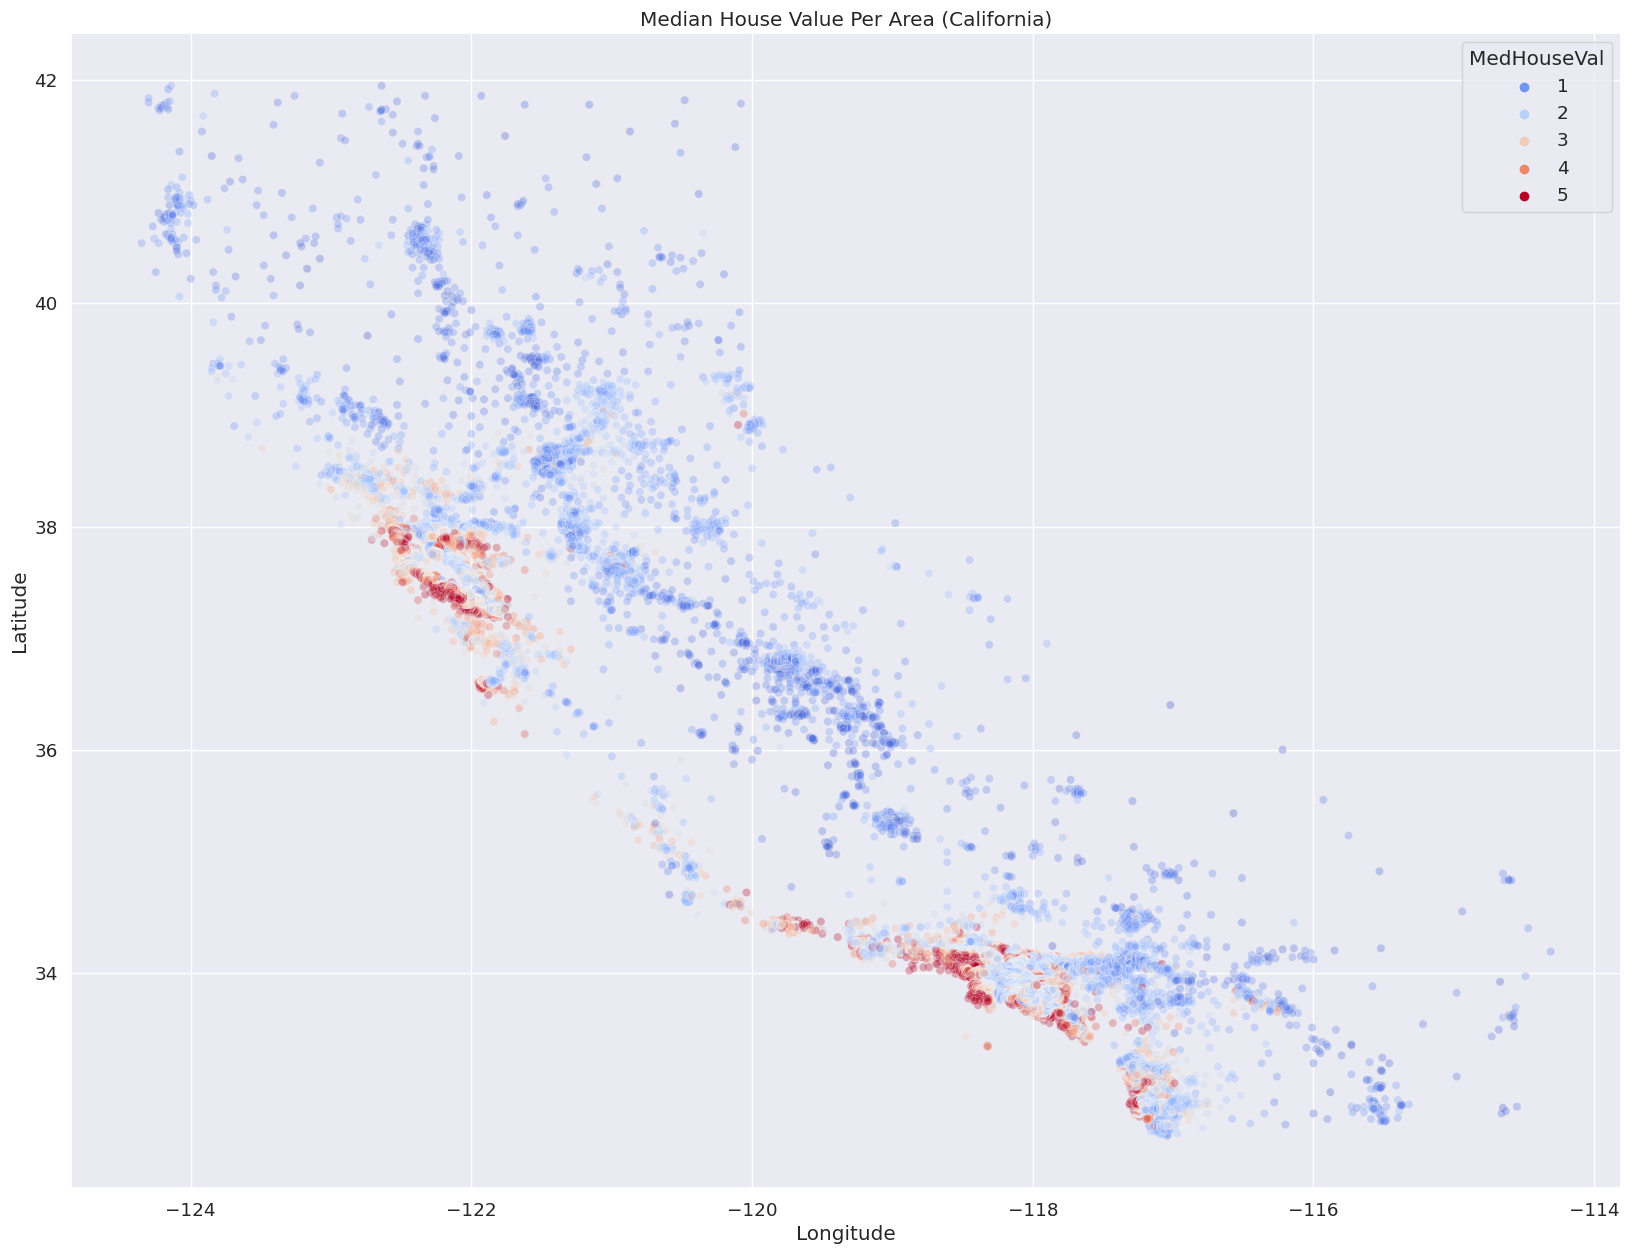

In [ ]:
sns.set(rc={'figure.figsize': [20, 15]}, font_scale=1.2)
ax = sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='MedHouseVal', palette='coolwarm', alpha=0.3);
ax.set_title("Median House Value Per Area (California)");

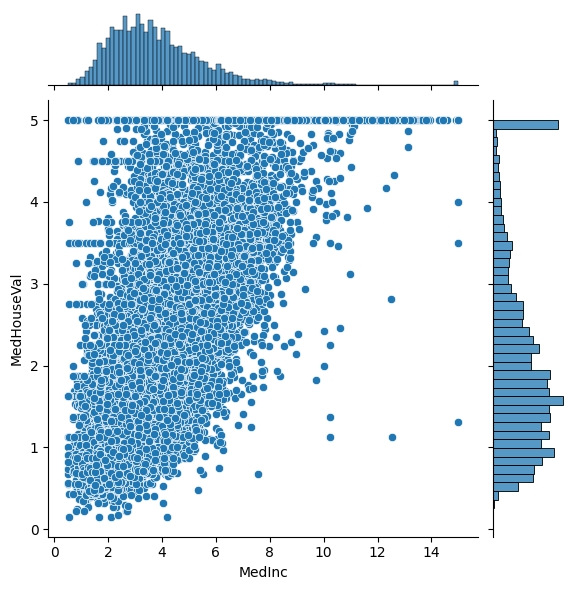

In [ ]:
sns.jointplot(data=df, x="MedInc", y="MedHouseVal")

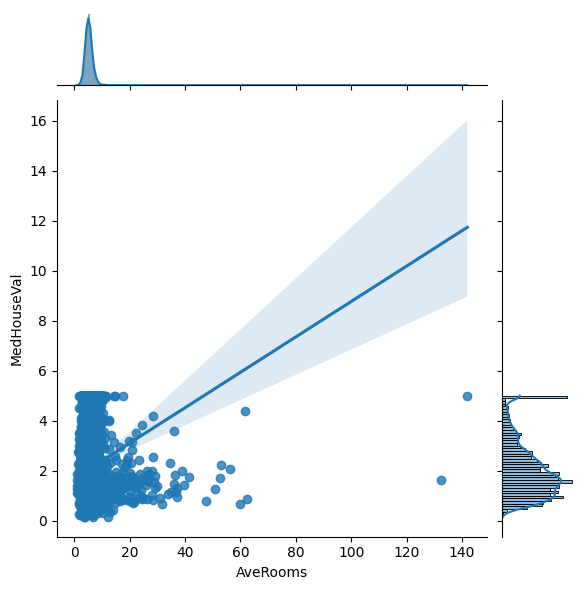

In [ ]:
sns.jointplot(data=df, x="AveRooms", y="MedHouseVal", kind="reg")

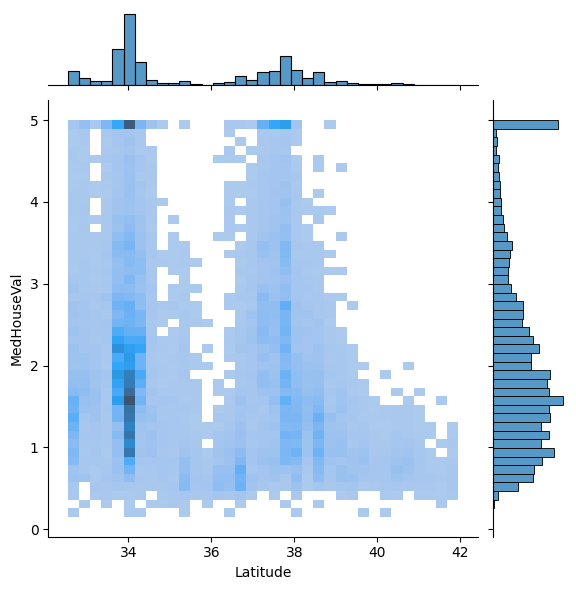

In [ ]:
sns.jointplot(data=df, x="Latitude", y="MedHouseVal", kind="hist")

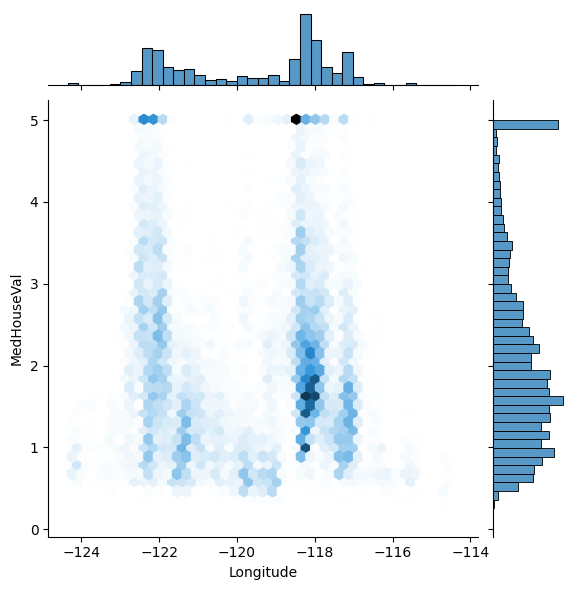

In [ ]:
sns.jointplot(data=df, x="Longitude", y="MedHouseVal", kind="hex")

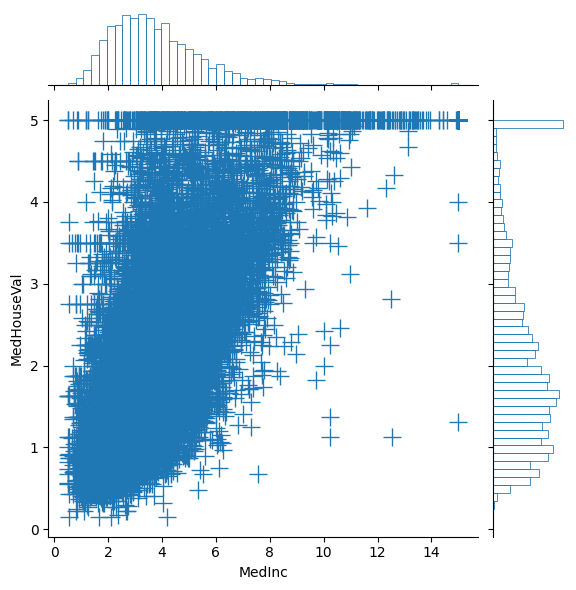

In [ ]:
sns.jointplot(
    data=df, x="MedInc", y="MedHouseVal",
    marker="+", s=150, marginal_kws=dict(bins=50, fill=False),
)

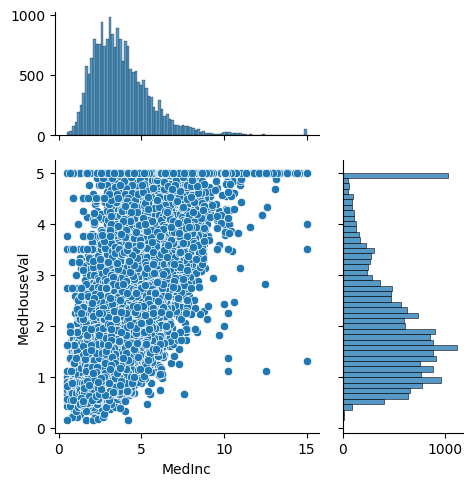

In [ ]:
sns.jointplot(data=df, x="MedInc", y="MedHouseVal", height=5, ratio=2, marginal_ticks=True)

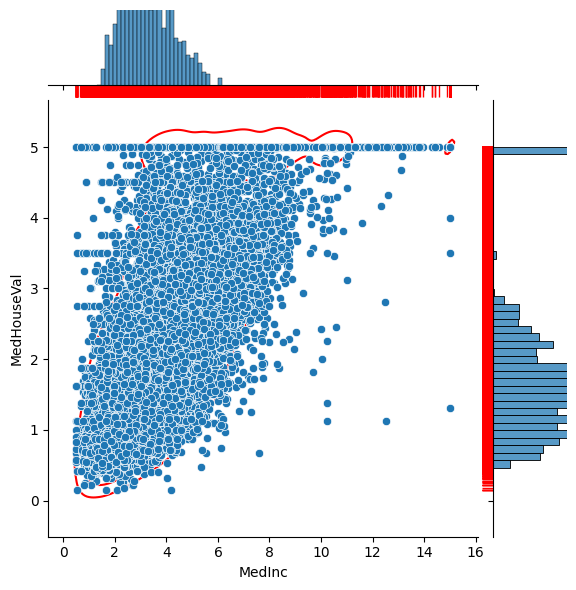

In [ ]:
g = sns.jointplot(data=df, x="MedInc", y="MedHouseVal")
g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)

<Axes: xlabel='Population', ylabel='MedHouseVal'>

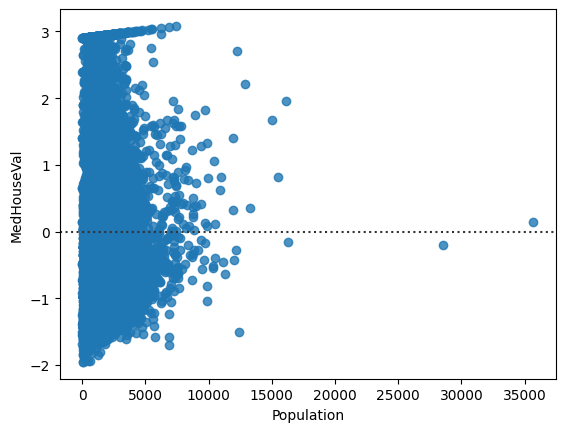

In [ ]:
sns.residplot(data=df, x="Population", y="MedHouseVal")

<Axes: xlabel='Population', ylabel='MedHouseVal'>

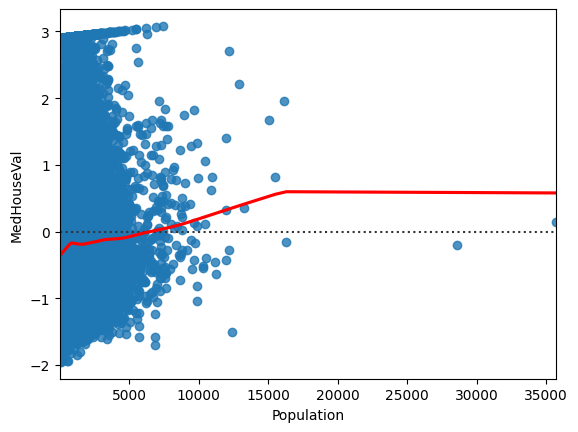

In [ ]:
sns.residplot(data=df, x="Population", y="MedHouseVal", lowess=True, line_kws=dict(color="r"))

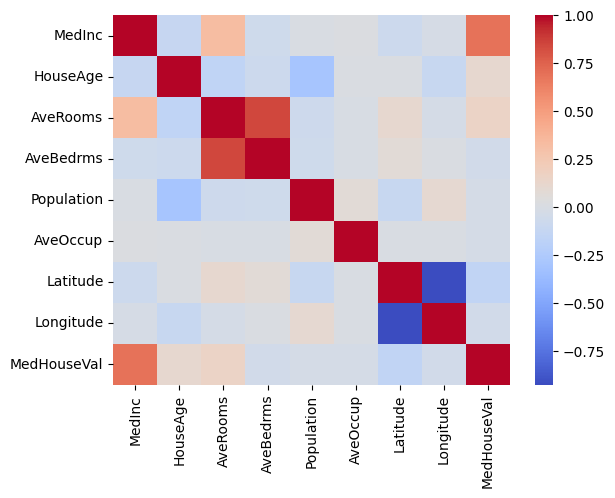

In [ ]:
corr_matrix = df.corr()

sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

## Нормализација на податоците со MinMaxScaler

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df[df.columns[:-1]],  df['MedHouseVal'], test_size=0.2)

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Linear Regression Model

In [ ]:
reg = LinearRegression().fit(X_train, Y_train)

r_sq = reg.score(X_train, Y_train)

print('Linear Regression Model\n')
print('Coefficient of determination:', r_sq)
print('\nIntercept: W0 =', reg.intercept_)
print('\nSlope: W =', reg.coef_)
y_pred_reg = reg.predict(X_test)
print('\nMSE:', mean_squared_error(Y_test, y_pred_reg))
print('\nMAE: ', mean_absolute_error(Y_test, y_pred_reg))

Linear Regression Model

Coefficient of determination: 0.609355771777687

Intercept: W0 = 3.6983015508618973

Slope: W = [  6.4515762    0.49804193 -15.87728934  22.05720789  -0.13679678
  -4.33932711  -3.89849689  -4.31457919]

MSE: 0.5452591285987024

MAE:  0.5370202862924083


```(y = w1 * x + w0)```
The function is: <br>
y = 6.4515762 * w1 + 0.49804193 * w2 - 15.87728934 * w3 + 22.05720789 * w4 - 0.13679678 * w5 - 4.33932711 * w6 - 3.89849689 * w7 - 4.31457919 * w8 + 3.6983015508618973 <br>
<br>
w1 = MedInc <br>
w2 = HouseAge <br>
w3 = AveRooms <br>
w4 = AveBedrms <br>
w5 = Population <br>
w6 = AveOccup <br>
w7 = Latitude <br>
w8 = Longitude <br>

## RidgeCV Regression Model

In [ ]:
ridge = RidgeCV().fit(X_train, Y_train)

r_sq = ridge.score(X_train, Y_train)

print('RidgeCV Model\n')
print('Coefficient of determination:', r_sq)
print('\nIntercept: W0 =', ridge.intercept_)
print('\nSlope: W =', ridge.coef_)
y_pred_ridge = ridge.predict(X_test)
print('\nMSE:', mean_squared_error(Y_test, y_pred_ridge))
print('\nMAE: ', mean_absolute_error(Y_test, y_pred_ridge))
print('\nAlpha: ', ridge.alpha_)

RidgeCV Model

Coefficient of determination: 0.6086991976212668

Intercept: W0 = 3.8018501560979896

Slope: W = [  6.18261857   0.5031156  -11.31578171  16.6126293   -0.11769293
  -3.9773461   -4.00398581  -4.41132199]

MSE: 0.5438766383017916

MAE:  0.5384718900769772

Alpha:  0.1


The function is: <br>
y = 6.18261857 * w1 + 0.5031156 * w2 - 11.31578171 * w3 + 16.6126293 * w4  - 0.11769293 * w5 - 3.9773461 * w6 - 4.00398581 * w7 - 4.41132199 * w8 + 3.8018501560979896

## LassoCV Regression Model

In [ ]:
lasso = LassoCV().fit(X_train, Y_train)

r_sq = lasso.score(X_train, Y_train)

print('LassoCV Model\n')
print('Coefficient of determination: ', r_sq)
print('\nIntercept: W0 =', lasso.intercept_)
print('\nSlope: W =', lasso.coef_)
y_pred_lasso = lasso.predict(X_test)
print('\nMSE:', mean_squared_error(Y_test, y_pred_lasso))
print('\nMAE: ', mean_absolute_error(Y_test, y_pred_lasso))
print('\nAlpha: ', lasso.alpha_)

LassoCV Model

Coefficient of determination:  0.6082859532195078

Intercept: W0 = 3.7995123807774447

Slope: W = [  6.12087456   0.50790647 -10.26922437  15.46373477  -0.01665278
  -3.06612972  -4.00881418  -4.41245339]

MSE: 0.5438040755697252

MAE:  0.5389423749698529

Alpha:  0.0001039500631296165


The function is: <br>
y = 6.12087456 * w1 + 0.50790647 * w2 - 10.26922437 * w3 + 15.46373477 * w4 - 0.01665278 * w5 - 3.06612972 * w6 - 4.00881418 * w7 - 4.41245339 * w8+ 3.7995123807774447

## Заклучок

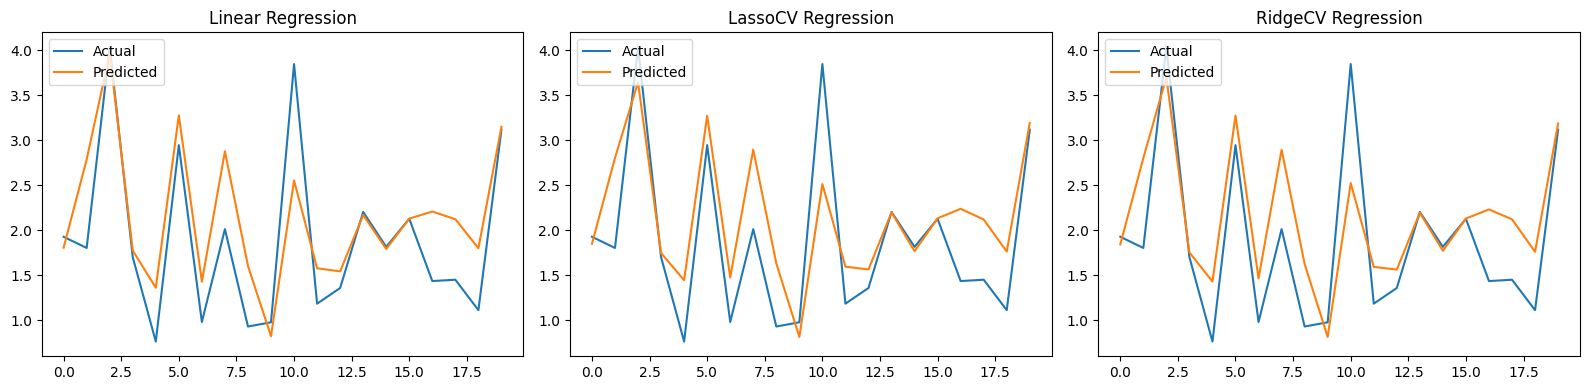

In [ ]:
figure, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred_reg}).reset_index(drop=True)
axes[0].plot(df[:20]);
axes[0].set_title("Linear Regression");
axes[0].legend(["Actual", "Predicted"], loc="upper left")

df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred_ridge}).reset_index(drop=True)
axes[2].plot(df[:20]);
axes[2].set_title("RidgeCV Regression");
axes[2].legend(["Actual", "Predicted"], loc="upper left")

df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred_lasso}).reset_index(drop=True)
axes[1].plot(df[:20]);
axes[1].set_title("LassoCV Regression");
axes[1].legend(["Actual", "Predicted"], loc="upper left")

plt.tight_layout()

In [ ]:
def get_metrics(p, y, model, x_train, y_train, y_pred):
    n = len(y)
    r_sq = model.score(x_train, y_train)
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    return r_sq, mae, mse

In [ ]:
p = X_train.shape[1]
pd.DataFrame([
              get_metrics(p, Y_test, reg, X_train, Y_train, y_pred_reg),
              get_metrics(p, Y_test, ridge, X_train, Y_train, y_pred_ridge),
              get_metrics(p, Y_test, lasso, X_train, Y_train, y_pred_lasso)
             ], 
    columns=['R2', 'MAE', 'MSE'],
    index=['Linear Regression', 'RidgeCV Regression', 'LassoCV Regression'])

,R2,MAE,MSE
Linear Regression,0.609356,0.537020,0.545259
RidgeCV Regression,0.608699,0.538472,0.543877
LassoCV Regression,0.608286,0.538942,0.543804


Разликите во коефициентите и во intercept параметрите помеѓу трите регресиони модели, се значајни. Средната квадратна грешка кај трите регресиони модели е од ист ред на големина, но сепак варира. 